# Topic Modeling using LDA

In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set_context(rc={"font.family":"sans","font.size":24,"axes.titlesize":24,"axes.labelsize":24})

# model building package
import sklearn

# package to clean text
import re

from nltk.corpus import stopwords
import nltk 

import warnings
warnings.filterwarnings("ignore")

# I did the whole lemmatization process on cloud platforms, now I'm importing the two halves of the dataset I lemmatized and merging them in a whole dataset.

In [2]:
path = "./lemmatized_wHM_full.csv"
tweets = pd.read_csv(path, encoding='utf-8')

### Now we can proceed with the proper LDA! 

We will start by vectorizing the words appearing in th lemmatized tweets, using sklearn tools, and then we will build a first model.
During the vectorization we will discard too frequent and too rare words. 
After that we will run the proper gridsearch to look for the best parameters of the model, in order to maximise the max-likelihood. 

In [3]:
tweets = tweets[tweets['lemmatized'].notna()]

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=250, lowercase=True)

# apply transformation
tf = vectorizer.fit_transform(tweets['lemmatized']) #.toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

tf_feature_names[:-1]

['02',
 '11th',
 '16inch',
 '1950',
 '1960',
 '1970',
 '1st',
 '20',
 '200219',
 '2020',
 '20th',
 '22',
 '2p',
 '3d',
 '3jsb',
 '50',
 '60',
 '70',
 '80',
 '90',
 '9th',
 'ab',
 'ab6',
 'abaya',
 'about',
 'abs',
 'absolutely',
 'abstract',
 'abstracta',
 'abuja',
 'academy',
 'accent',
 'accesorio',
 'access',
 'accessories',
 'accessory',
 'accomplish',
 'accra',
 'ace',
 'ackermann',
 'acne',
 'acrylic',
 'acrylicblock',
 'act',
 'action',
 'activewear',
 'actor',
 'actorslife',
 'actress',
 'actually',
 'ad',
 'add',
 'addict',
 'addition',
 'adeco',
 'adeola',
 'adida',
 'adidas',
 'adiida',
 'adjustable',
 'adorable',
 'adult',
 'adveise',
 'adventure',
 'advice',
 'ae',
 'aesthetic',
 'af',
 'afalaxy',
 'affiliatemarkete',
 'affordable',
 'africa',
 'african',
 'afro',
 'after',
 'afterpay',
 'again',
 'agallery',
 'age',
 'agency',
 'agencyprod',
 'aging',
 'ago',
 'ah',
 'ahistory',
 'ai',
 'aicle',
 'air',
 'airjordan',
 'airpo',
 'aisan',
 'aishwaryaraibachchan',
 'aist',
 

We also will try using digrams.

In [5]:
# the vectorizer object will be used to transform text to vector form - ngrams. We use unigrams and digrams. 
vectorizer_ngram = CountVectorizer(max_df=0.9, min_df=250, ngram_range=(1,2), lowercase=True)

# apply transformation
tf_ngram = vectorizer_ngram.fit_transform(tweets['lemmatized']) #.toarray()

# tf_feature_names tells us what word each column in the matrix represents
tf_ngram_feature_names = vectorizer_ngram.get_feature_names()

tf_ngram_feature_names

['02',
 '11th',
 '11th coachfw20',
 '11th pm',
 '16inch',
 '1950',
 '1960',
 '1970',
 '1st',
 '20',
 '20 02',
 '200219',
 '200219 mfw',
 '2020',
 '20th',
 '20th pm',
 '22',
 '2p',
 '3d',
 '3jsb',
 '3jsb ldh',
 '50',
 '60',
 '70',
 '80',
 '90',
 '9th',
 '9th competition',
 'ab',
 'ab6',
 'ab6 ix',
 'abaya',
 'about',
 'abs',
 'absolutely',
 'abstract',
 'abstracta',
 'abuja',
 'academy',
 'academy award',
 'accent',
 'accent acrylicblock',
 'accesorio',
 'access',
 'access kors',
 'accessories',
 'accessories lifestyle',
 'accessory',
 'accessory blanket',
 'accessory fashion',
 'accessory fashiontrend',
 'accessory jewelry',
 'accessory style',
 'accomplish',
 'accomplish tiffany',
 'accra',
 'ace',
 'ackermann',
 'acne',
 'acrylic',
 'acrylicblock',
 'acrylicblock accessory',
 'act',
 'action',
 'activewear',
 'activewear workout',
 'actor',
 'actorslife',
 'actress',
 'actress instagram',
 'actress model',
 'actress television',
 'actually',
 'ad',
 'ad fashion',
 'add',
 'add daily'

In [6]:
# Helper function to plot the most common words 
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

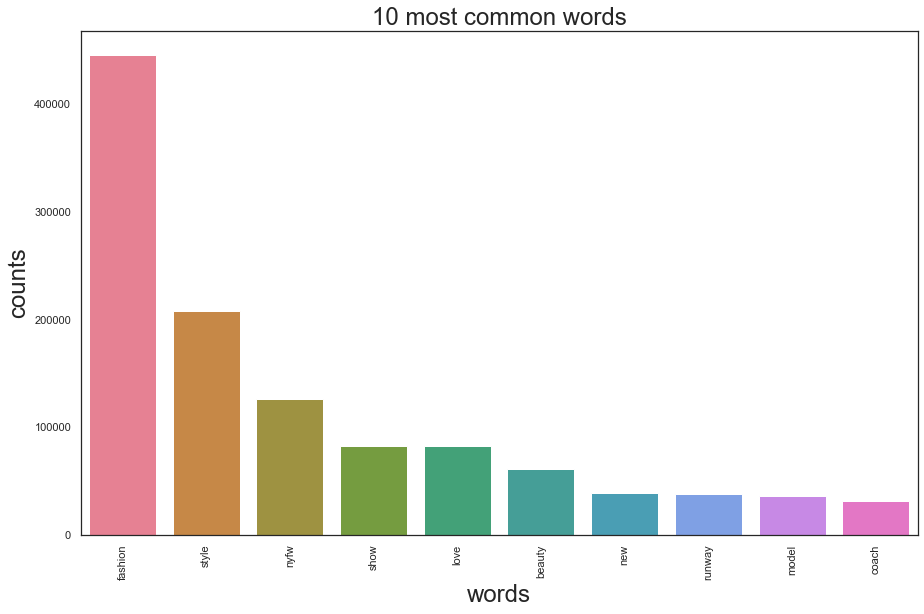

In [7]:
plot_10_most_common_words(tf,vectorizer)

We save these vectorizers on disk 

In [8]:
import pickle

# pickle vectorizer
filename = 'models/count_vectorizer.sav'
pickle.dump(vectorizer, open(filename, 'wb'))

# pickle vectorizer - ngram
filename = 'models/ngram_count_vectorizer.sav'
pickle.dump(vectorizer_ngram, open(filename, 'wb'))

We can give a look at the sparcity of the words, in our tf vectors. 

### GridSearch the best LDA model
We performed grid search on a cloud computing service, so we exclude it here. The best model parameters turned out being:
- `n_components`: number of topics = 4, but we will try with 5 as well. Also 50 topics gave a good likelihood and perplexity score, but we believe it might be less interpretable and useful for our task.
- `learning_decay`: which controls the learning rate = 0.9.


In [9]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 50
learning_decay = 0.9
random_state = 1234

model = LatentDirichletAllocation(n_components=number_of_topics,n_jobs = -1, evaluate_every = -1, random_state=random_state, learning_decay=learning_decay) # random state for reproducibility

In [10]:
lda_output = model.fit_transform(tf)

### Diagnose model performance with perplexity and log-likelihood

A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good.

In [11]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", model.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", model.perplexity(tf))

# See model parameters
print(model.get_params())

Log Likelihood:  -50699183.4250336
Perplexity:  717.3739812273453
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.9, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 5, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 1234, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [11]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", model.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", model.perplexity(tf))

# See model parameters
print(model.get_params())

Log Likelihood:  -45397726.694851264
Perplexity:  360.6858775179093
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.9, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 50, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 1234, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


Let's print the topics modelled

In [12]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [13]:
print("Topics found via LDA:")
number_of_words = 10
print_topics(model, vectorizer, number_of_words)

Topics found via LDA:

Topic #0:
see best milanfashionweek celebrity style fw20 highlight gucci angel nyfw

Topic #1:
fashion sale luxury design deal today shopping business fur winterfashion

Topic #2:
minhyun milanfashionweek nuest twitter hang willsmith womenswear thursday today pm

Topic #3:
fashion shopping clothes earring glass baby bag murano handmade shoe

Topic #4:
vogue blackpink magazine jennie cover lisa jisoo rose appear chinese

Topic #5:
fashion fashionweek paris show jessicajung jessica week แต pfw แฟช

Topic #6:
bag kors show nyfw fashion store michael shop handbag wednesday

Topic #7:
model fashion photography follow beautiful photo porait photoshoot love photographer

Topic #8:
공항 공항패션 출국 패션 디스패치 블랙핑크 리사 입국 방탄소년단 오늘

Topic #9:
fashion clothing now apparel style streetwear shop tee brand tshi

Topic #10:
fashion style dress ebay black size sneaker woman check shoe

Topic #11:
fashion jewelry vintage bracelet etsy necklace earring gold handmade silver

Topic #12:
love 

In [14]:
from pyLDAvis import gensim as ldavis_gensim
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os 

LDAvis_prepared = sklearn_lda.prepare(model, tf, vectorizer)

pyLDAvis.display(LDAvis_prepared)

#### Let's see what this tells us: 
- <b>`Topics 1 and 2`</b>: clearly represent the same thing (as it can be seen also from the PCA visualzation), being the more general words and hashtags related to fashion (fashion, style, fashionblogger...). From this we could already say that we can shrink the number of topics down to 4 (as suggested by perplexity and log likelihood).
- <b>`Topic 3`</b>: refers more to the NYFw with words such as "bella", "hadid", "coach", "marc", "jacobs", "nickiminaj"
- <b>`Topic 4`</b>: is related to Prada and Blackpink, that are related as we've already analyzed in our previous notebooks.
- <b>`Topic 5`</b>: might refer to the fashion week as an event itself, including different brands (from both NYFW and MFW) such as "Michael Kors", "Moschino", "Tiffany", and more general FW related words as "nyfw", "mfw", "walk", "collection", "fw20".

In [15]:
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_of_topics))
with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [16]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath,'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_of_topics) +'.html')

In [17]:
# pickle best lda model
filename = 'models/best_lda_model'+str(number_of_topics)+'.sav'
pickle.dump(model, open(filename, 'wb'))

### Let's repeat the same thing applyng it on the digrams tf matrix

In [20]:
lda_output_ngram = model.fit_transform(tf_ngram)

In [21]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", model.score(tf_ngram))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", model.perplexity(tf_ngram))

# See model parameters
print(model.get_params())

Log Likelihood:  -78946573.55938613
Perplexity:  1280.724881927387
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.9, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 5, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 1234, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


Let's print the topics modelled

In [22]:
print("Topics found via LDA:")
number_of_words = 10
print_topics(model, vectorizer_ngram, number_of_words)

Topics found via LDA:

Topic #0:
nyfw fashion show mfw new fw20 marc week jacobs marc jacobs

Topic #1:
show style nyfw runway runway show love style love coach beauty style beauty

Topic #2:
fashion beauty love style 공항 beautiful jewelry follow 공항패션 출국

Topic #3:
fashion style fashion style dress love fashionblogger new design woman ootd

Topic #4:
fashion ファッション lisa show blackpink ファッション fashion nyfw vogue lalisa sale


In [24]:
LDAvis_prepared_ngram = sklearn_lda.prepare(model, tf_ngram, vectorizer_ngram)

pyLDAvis.display(LDAvis_prepared_ngram)

No major changes with respect to the model simply using bag of words result from applying the LDA to digrams. The 5 topics actually appear quite similar to the previous case.

In [25]:
LDAvis_data_filepath_ngram = os.path.join('./ldavis_prepared_ngram'+str(number_of_topics))
with open(LDAvis_data_filepath_ngram, 'wb') as f:
        pickle.dump(LDAvis_prepared_ngram, f)

In [26]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath_ngram,'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared_ngram, './ldavis_prepared_ngram_'+ str(number_of_topics) +'.html')

In [27]:
# pickle best lda model
filename = 'models/best_lda_ngram_model.sav'
pickle.dump(model, open(filename, 'wb'))

### Let's try to now feed the LDA model with a tf-idf matrix 

We will use gensim instead for LDA 

In [29]:
import gensim
from gensim import corpora, models 

/home/antonio/anaconda3/lib/python3.7/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [39]:
import re
from preprocessor import TwitterPreprocessor
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

/home/antonio/preprocessor.py:124: DeprecationWarning: invalid escape sequence \s
  self.text = re.sub('\s+', ' ', self.text)
/home/antonio/preprocessor.py:129: DeprecationWarning: invalid escape sequence \s
  self.text = re.sub('\s+', ' ', self.text)
/home/antonio/preprocessor.py:155: DeprecationWarning: invalid escape sequence \s
  self.text = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', self.text)  # remove retweet


In [40]:
def preproc(tweet):
    tweet = str(tweet)
    prep = TwitterPreprocessor(tweet)
    prep.remove_emoji()
    if not tweet:
        return float('NaN')
    return prep.text.lower().split(' ')

preproc_tweets = tweets['lemmatized'].apply(preproc).dropna().values

First we define a dictionary with the words from tweets, but only the 25000 top ones, excluding the ones used less than 15 times and the ones appearing in more than 80% of the tweets.

In [42]:
dictionary = gensim.corpora.Dictionary(preproc_tweets)
dictionary.filter_extremes(no_below=15, no_above=0.8, keep_n=50000)
dictionary.compactify()

We build a bag of words starting from the dictionary we built

In [43]:
bow_corpus = [dictionary.doc2bow(tweet) for tweet in preproc_tweets]

We can now buid a tf-idf matrix for the bag of words we built, in order to feed it to the LDA model. 

In [44]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
corpus_tfidf

In [45]:
num_topics = 5
decay = 0.9
random_state=1234

In [47]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, passes=2, workers=7, decay=decay, random_state=random_state)

In [48]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx,topic))

Topic: 0 Word: 0.007*"style" + 0.006*"fashion" + 0.005*"nyfw" + 0.004*"coach" + 0.004*"win" + 0.004*"good" + 0.004*"deal" + 0.004*"show" + 0.004*"today" + 0.004*"fw20"
Topic: 1 Word: 0.009*"style" + 0.006*"fashion" + 0.006*"nyfw" + 0.005*"love" + 0.005*"beautiful" + 0.004*"likeforlike" + 0.004*"beauty" + 0.004*"follow" + 0.004*"victoriajustice" + 0.004*"look"
Topic: 2 Word: 0.009*"공항패션" + 0.008*"공항" + 0.008*"marc" + 0.008*"jacobs" + 0.008*"nyfw" + 0.008*"패션" + 0.007*"디스패치" + 0.007*"출국" + 0.006*"hadid" + 0.006*"lisa"
Topic: 3 Word: 0.014*"nyfw" + 0.009*"fall" + 0.008*"fashion" + 0.008*"kors" + 0.007*"show" + 0.007*"access" + 0.007*"runway" + 0.007*"michaelkorscollection" + 0.006*"week" + 0.005*"joy"
Topic: 4 Word: 0.016*"nyfw" + 0.007*"gqxpeckxcoach" + 0.007*"coach" + 0.006*"style" + 0.006*"fashion" + 0.005*"jewelry" + 0.005*"show" + 0.005*"love" + 0.005*"coachfw20" + 0.004*"earring"


In [49]:
LDAvis_prepared_gensim = ldavis_gensim.prepare(lda_model_tfidf,corpus_tfidf,dictionary)

pyLDAvis.display(LDAvis_prepared_gensim)

In [50]:
LDAvis_tfidf_filepath = os.path.join('./ldavis_prepared_gensim_'+str(num_topics))
with open(LDAvis_tfidf_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [51]:
with open(LDAvis_tfidf_filepath,'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_gensim'+ str(num_topics) +'.html')

In [52]:
# pickle best lda model
import pickle
filename = 'models/best_lda_model_gensim.sav'
pickle.dump(lda_model_tfidf, open(filename, 'wb'))